In [1]:
# Import necessary libraries
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


### Reading the dataset

In [2]:
# Read the file "dataset.csv" as a Pandas dataframe
df = pd.read_csv("dataset.csv")

# Take a quick look at the dataset
df.head()


,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [3]:
# Assign the values of the x and y column values to the 
# predictor and response variables
x = df[['x']].values
y = df.y.values


### Train-validation split

In [13]:
### edTest(test_random) ###

# Split the dataset into train and validation sets with 75% training set
# Set random_state=1
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=1)


### Computing the train and validation error in terms of MSE

In [17]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 18

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(1, maxdeg+1):
    
    # Compute the polynomial features for the current degree 
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d ).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    
    # Initialize a linear regression model, 
    # Note: Sklearn's PolynomialFeatures adds a bias column by default.
    # Set fit_intercept = False when initializing the linear regression
    # model to avoid having 2 intercepts.
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)
    
    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)
    
    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val_pred,y_val))
    

### Finding the best degree

In [18]:
### edTest(test_best_degree) ###

# Helper code to compute the best degree, which is the model 
# with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)+1

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)


The best degree of the model is 2


### Plotting the error graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


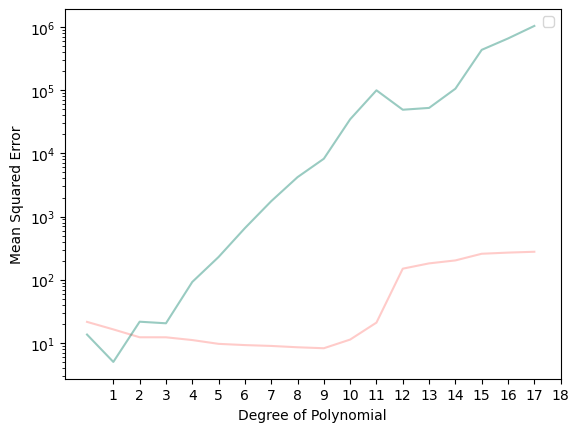

In [19]:
# Plot the errors as a function of increasing d value to visualise the training 
# and testing errors
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(training_error, color='#FF7E79', alpha=0.4)

# Plot the validation error with labels
ax.plot(validation_error, color='#007D66', alpha=0.4)

# Set the plot labels and legends
ax.set_xlabel('Degree of Polynomial')
ax.set_xticks(range(1, maxdeg+1))
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show();


#### ⏸ If you run the exercise with a random state of 0, do you notice any change? What would you attribute this change to?

In [0]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below 
answer1 = 'yes'